# Exploring spread of Covid using Population Parameters as a predictor

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
sb.set()

In [2]:
usa_covid = pd.read_csv('county_megaset.csv')
usa_covid['Death to Case Ratio'] = pd.DataFrame(usa_covid['Deaths']/usa_covid['Confirmed'])
usa_covid.head()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Name,State,Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,...,County_Name_y,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,Death to Case Ratio
0,161526,1001,1.539602e+09,25706961,Autauga County,Alabama,2.59,0.05,2.59,0.07,...,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",7/27/20,932,20,0.021459
1,161527,1003,4.117547e+09,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,0.06,...,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",7/27/20,2727,17,0.006234
2,161528,1005,2.292145e+09,50538698,Barbour County,Alabama,2.49,0.07,2.44,0.11,...,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",7/27/20,529,4,0.007561
3,161529,1007,1.612167e+09,9602089,Bibb County,Alabama,2.99,0.14,3.05,0.18,...,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",7/27/20,327,2,0.006116
4,161530,1009,1.670104e+09,15015423,Blount County,Alabama,2.77,0.05,2.85,0.07,...,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",7/27/20,601,1,0.001664


In [3]:
usa_covid.describe()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,Average Household Size of Renter-Occupied Unit,Average Household Size of Renter-Occupied Unit - Margin of Error,...,Total NonFamily Hhlds w/Female Householder *margin of error,Shape__Area,Shape__Length,UID,code3,Lat,Long_,Confirmed,Deaths,Death to Case Ratio
count,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3219.000000,3219.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.00000,3159.000000
mean,9.628897e+05,31393.605280,2.844093e+09,2.143251e+08,2.529093,0.081494,2.563088,0.102336,2.444950,0.202314,...,345.832609,2.581581,0.342835,8.352270e+07,834.913043,37.965788,-91.661759,1316.137578,45.27764,0.021551
std,5.174236e+05,16292.078954,9.255389e+09,1.220804e+09,0.279374,0.067781,0.274885,0.079810,0.393263,0.182878,...,372.099228,3.558888,1.790048,3.222722e+06,32.290983,6.095200,13.388721,6962.304363,456.31641,0.028900
min,2.390100e+04,1001.000000,5.300265e+06,0.000000e+00,1.340000,0.010000,1.790000,0.010000,1.360000,0.010000,...,12.000000,0.126110,0.000550,6.307200e+07,630.000000,17.982429,-174.159600,0.000000,0.00000,0.000000
25%,4.849888e+05,19032.500000,1.085268e+09,7.009854e+06,2.350000,0.040000,2.400000,0.050000,2.200000,0.100000,...,135.000000,1.622240,0.114586,8.401806e+07,840.000000,34.353621,-98.086287,43.000000,0.00000,0.000000
50%,9.741585e+05,30024.000000,1.565689e+09,1.938601e+07,2.490000,0.070000,2.520000,0.090000,2.400000,0.170000,...,235.000000,1.975052,0.164877,8.402910e+07,840.000000,38.212711,-89.945118,158.000000,2.00000,0.012367
75%,1.419973e+06,46105.500000,2.368884e+09,6.069241e+07,2.650000,0.100000,2.690000,0.130000,2.640000,0.250000,...,405.250000,2.594089,0.246600,8.404504e+07,840.000000,41.694461,-82.990516,585.000000,13.00000,0.029668
max,2.516404e+06,72153.000000,3.770000e+11,2.599228e+10,4.970000,1.140000,4.880000,1.460000,6.810000,5.490000,...,4295.000000,71.549539,74.257061,8.405604e+07,840.000000,69.314792,-65.288130,224051.000000,23500.00000,0.285714


In merging all data sets, we now have over 300 columns of data, many of which can be used as predictor variables for our study. In this portion, we will be using population and its associated parameters as predictors for covid cases, covid related deaths, and finally the death-to-case ratio.

The predictor variables of choice in this portion will be:
>  Average Household Size  
>  Total Population  
>  Population Density (people per square kilometer)  


Our belief is that population and population density will affect the spread of Covid-19 as a higher population may encourage interactions among people and quicken the spread of the virus.

In [4]:
usa_covid_population = usa_covid[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)', 'Confirmed', 'Deaths', 'Death to Case Ratio']]

## Bi-Variate Analysis: Average Household Size as a predictor Variable

In [5]:
usa_covid_household = usa_covid_population[['Average Household Size', 'Confirmed', 'Deaths', 'Death to Case Ratio']]
usa_covid_household.head()

,Average Household Size,Confirmed,Deaths,Death to Case Ratio
0,2.59,932,20,0.021459
1,2.61,2727,17,0.006234
2,2.49,529,4,0.007561
3,2.99,327,2,0.006116
4,2.77,601,1,0.001664


In [6]:
usa_covid_household.describe()

,Average Household Size,Confirmed,Deaths,Death to Case Ratio
count,3220.000000,3220.000000,3220.00000,3159.000000
mean,2.529093,1316.137578,45.27764,0.021551
std,0.279374,6962.304363,456.31641,0.028900
min,1.340000,0.000000,0.00000,0.000000
25%,2.350000,43.000000,0.00000,0.000000
50%,2.490000,158.000000,2.00000,0.012367
75%,2.650000,585.000000,13.00000,0.029668
max,4.970000,224051.000000,23500.00000,0.285714


Before commencing with the bi-variate exploration against our desired response variable, we do a uni-variate analysis of our predictor variable and observe how our predictor variable of Average Household Size is distributed amongst the different counties of the US.

<AxesSubplot:>

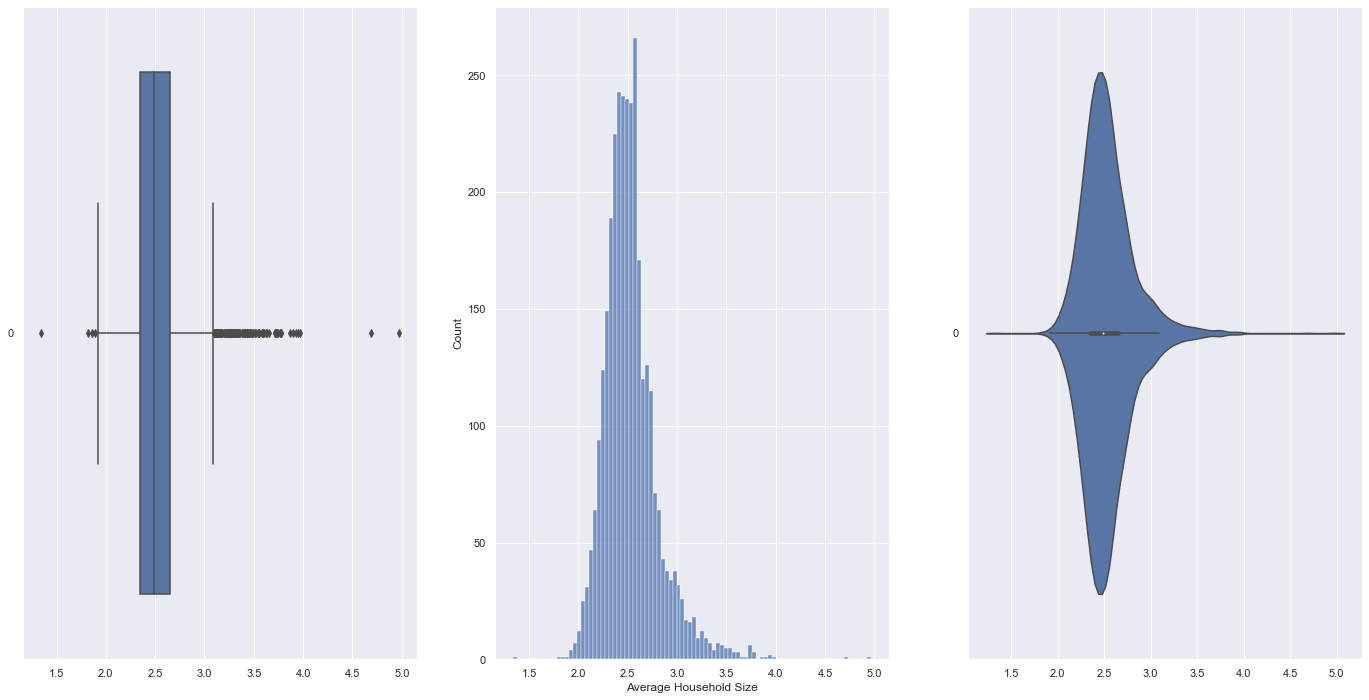

In [7]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid_household['Average Household Size'], orient = "h", ax = axes[0])
sb.histplot(data = usa_covid_household['Average Household Size'], ax = axes[1])
sb.violinplot(data = usa_covid_household['Average Household Size'], orient = "h", ax = axes[2])

In [8]:
usa_covid_household['Average Household Size'].skew()

1.4970599849472994

Here we observe Average Household Size to be fairly normally distributed. However we do note, that the skewness of the distribution is 1.497, denoting a heavy right skew for the distribution. Looking at each of the plots of the data, we note that the median lies at around 2.5 average heads per household, with most of the data ranging from the 2 to 3 range. Without removing outliers just yet, let's see how this data translates to our response variables.

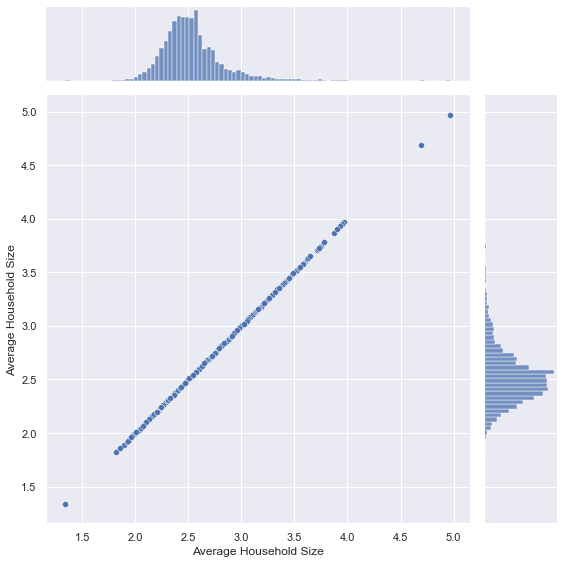

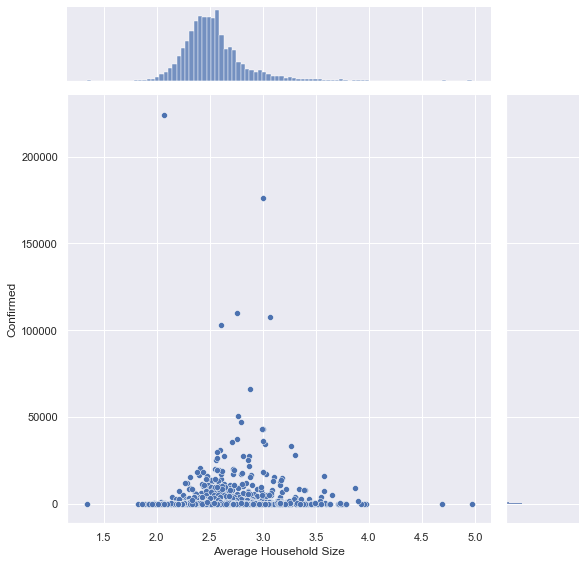

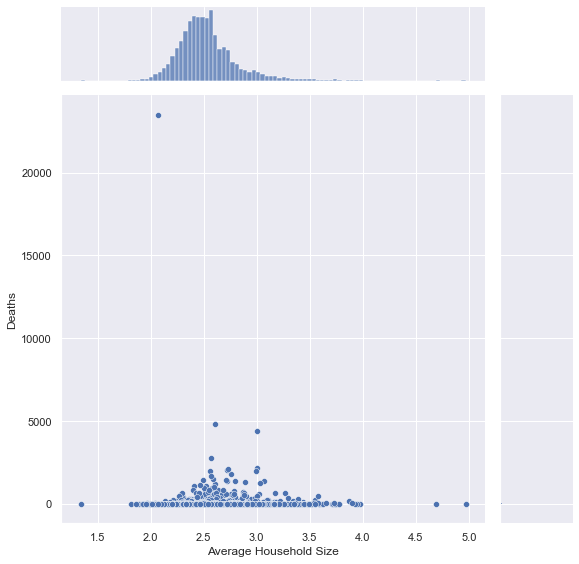

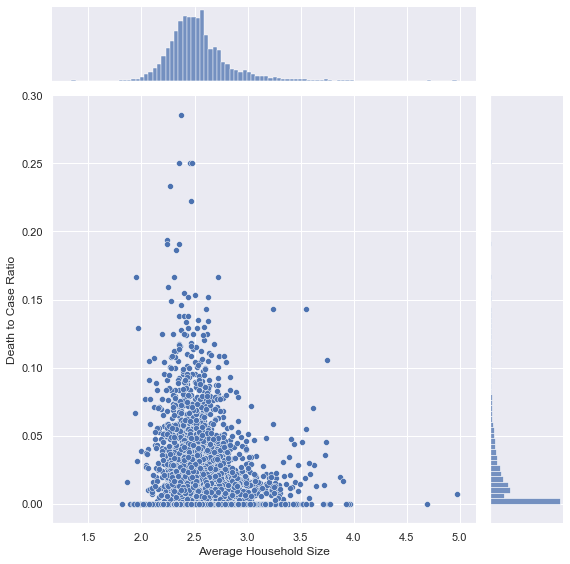

In [9]:
for var in usa_covid_household:
    sb.jointplot(data = usa_covid_household, x = "Average Household Size", y = var, height = 8)

In [10]:
usa_covid_household.corr()

,Average Household Size,Confirmed,Deaths,Death to Case Ratio
Average Household Size,1.000000,0.101094,0.015379,-0.025265
Confirmed,0.101094,1.000000,0.794622,0.084918
Deaths,0.015379,0.794622,1.000000,0.135629
Death to Case Ratio,-0.025265,0.084918,0.135629,1.000000


<AxesSubplot:>

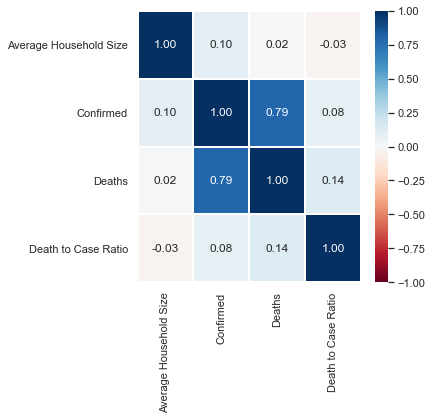

In [11]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usa_covid_household.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Placing each of the response variables against the predictor variable of Average Household Size, we see very interesting behaviour. It seems as though the variables simply fit into the distribution of Average Household Size, and that may be because the data points of each of the response variables are clustered towards extremes. In order to combat that, let us remove any outliers in the predictor and response variables and review the jointplots.

In [12]:
def removeOutliers(df):
    temp = pd.DataFrame()
    for var in df:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        temp[var] = df[var][((df[var] > (Q1 - 1.5 * IQR)) & (df[var] < (Q3 + 1.5 * IQR)))]
    temp = temp.dropna()
    return temp

In [13]:
usa_covid_household_clean = pd.DataFrame(removeOutliers(usa_covid_household))

In [14]:
usa_covid_household_clean.head()

,Average Household Size,Confirmed,Deaths,Death to Case Ratio
0,2.59,932.0,20.0,0.021459
2,2.49,529.0,4.0,0.007561
3,2.99,327.0,2.0,0.006116
4,2.77,601.0,1.0,0.001664
5,2.75,409.0,11.0,0.026895


In [15]:
usa_covid_household_clean.describe()

,Average Household Size,Confirmed,Deaths,Death to Case Ratio
count,2404.000000,2404.000000,2404.00000,2404.000000
mean,2.476011,226.937188,3.92970,0.014179
std,0.213382,278.984215,6.27306,0.016965
min,1.920000,1.000000,0.00000,0.000000
25%,2.330000,37.000000,0.00000,0.000000
50%,2.460000,112.000000,1.00000,0.008858
75%,2.600000,307.000000,5.00000,0.022960
max,3.090000,1386.000000,32.00000,0.074074


<AxesSubplot:>

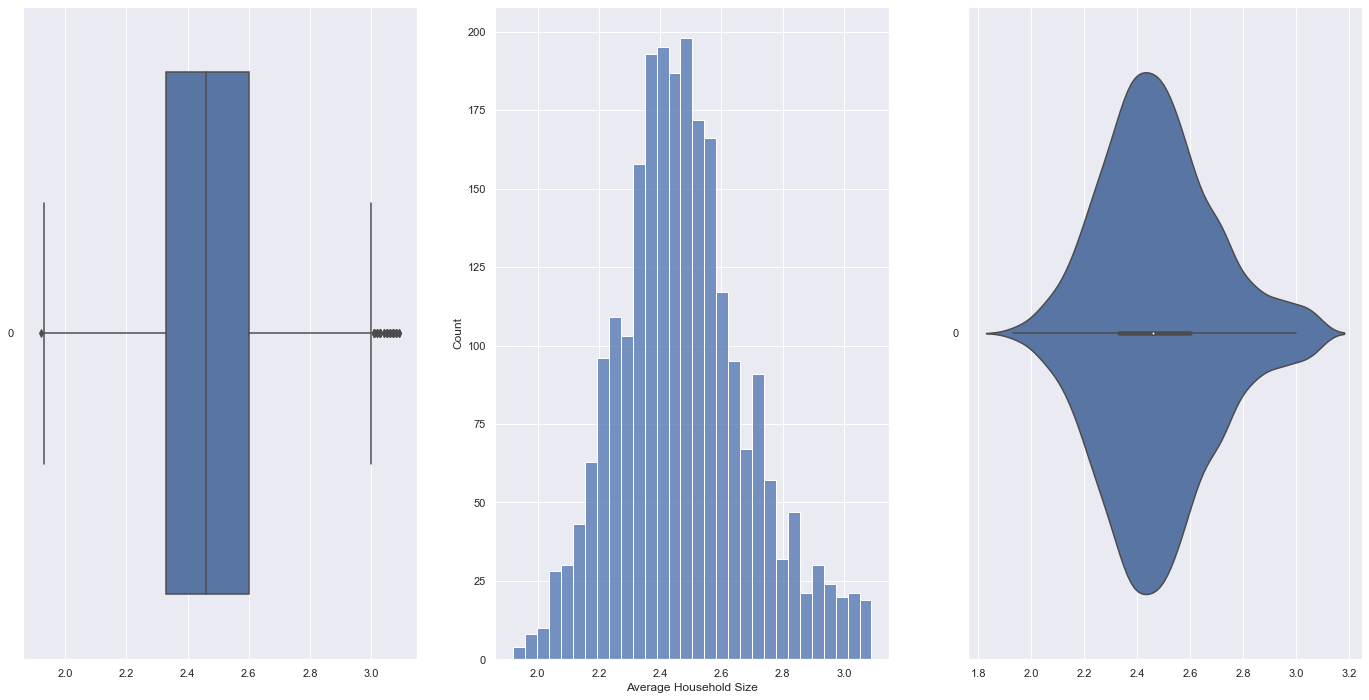

In [16]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid_household_clean['Average Household Size'], orient = "h", ax = axes[0])
sb.histplot(data = usa_covid_household_clean['Average Household Size'], ax = axes[1])
sb.violinplot(data = usa_covid_household_clean['Average Household Size'], orient = "h", ax = axes[2])

In [17]:
usa_covid_household_clean['Average Household Size'].skew()

0.425750872493987

With outliers removed we see a much more symmetrical distribution, with a much lower skewness at 0.356. Now, lets plot this new data set without outliers against our response variables.

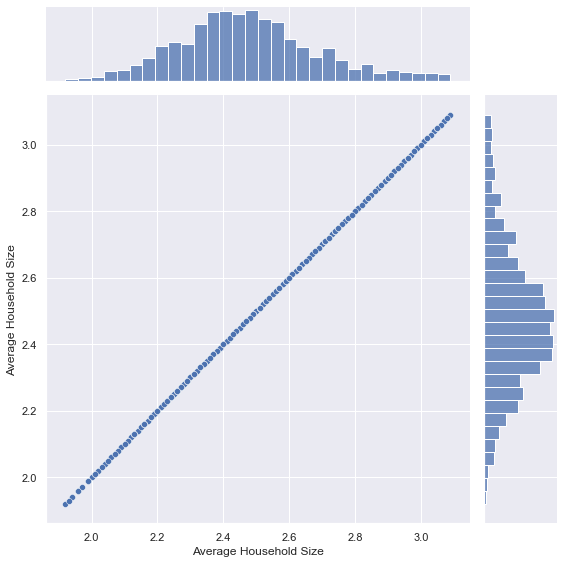

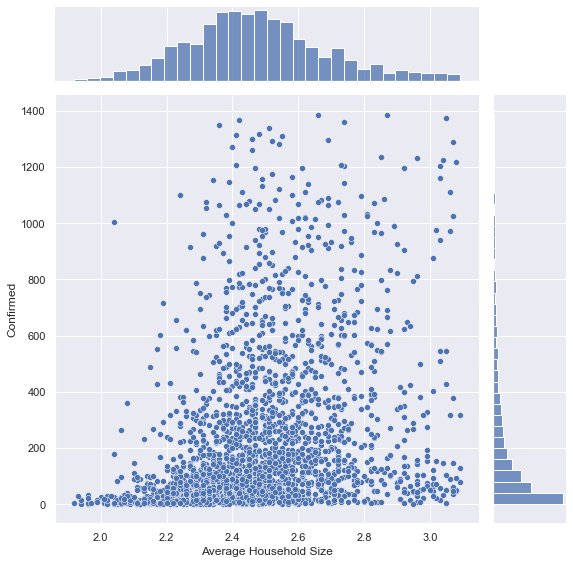

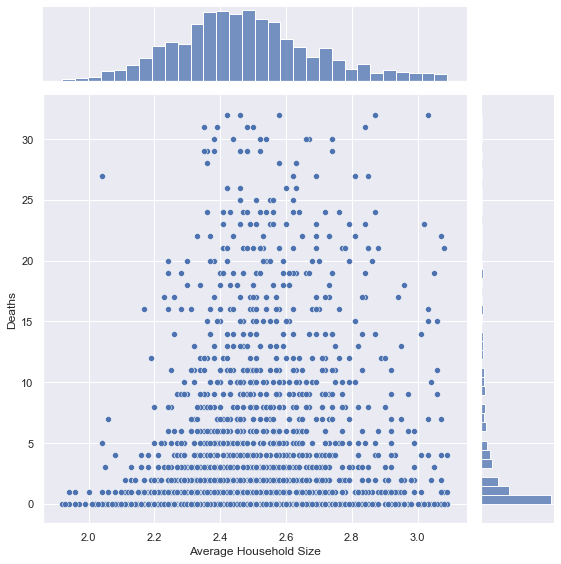

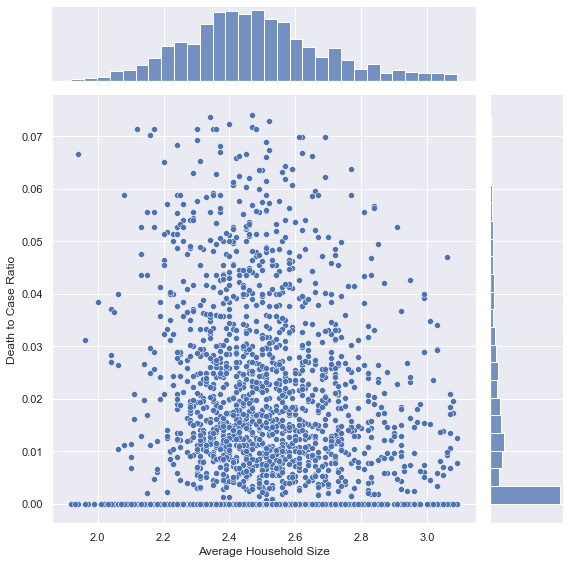

In [18]:
for var in usa_covid_household_clean:
    sb.jointplot(data = usa_covid_household_clean, x = "Average Household Size", y = var, height = 8)

In [19]:
usa_covid_household_clean.corr()

,Average Household Size,Confirmed,Deaths,Death to Case Ratio
Average Household Size,1.000000,0.309568,0.208933,0.048487
Confirmed,0.309568,1.000000,0.712164,0.150468
Deaths,0.208933,0.712164,1.000000,0.571411
Death to Case Ratio,0.048487,0.150468,0.571411,1.000000


<AxesSubplot:>

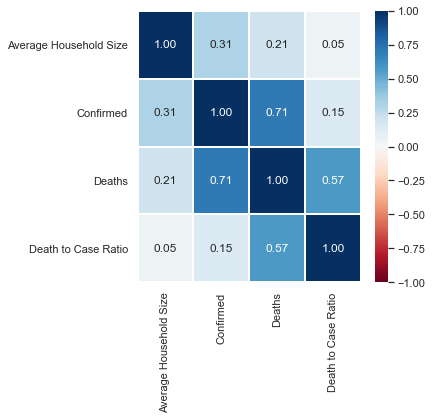

In [20]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usa_covid_household_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Here we see there is little linear correlation between our predictor Average Household Size and the response variables, besides a low correlation between Average HouseHold Size and Confirmed cases. Nevertheless, we will observe other aspects of population parameters to see if we can build a fruitful model for the response variable.

## Bi-Variate Analysis: Total Population as a predictor Variable

In [21]:
usa_covid_total = usa_covid_population[['Total Population', 'Confirmed', 'Deaths', 'Death to Case Ratio']]
usa_covid_total.head()

,Total Population,Confirmed,Deaths,Death to Case Ratio
0,55200,932,20,0.021459
1,208107,2727,17,0.006234
2,25782,529,4,0.007561
3,22527,327,2,0.006116
4,57645,601,1,0.001664


In [22]:
usa_covid_total.describe()

,Total Population,Confirmed,Deaths,Death to Case Ratio
count,3.220000e+03,3220.000000,3220.00000,3159.000000
mean,1.013323e+05,1316.137578,45.27764,0.021551
std,3.260964e+05,6962.304363,456.31641,0.028900
min,7.500000e+01,0.000000,0.00000,0.000000
25%,1.121425e+04,43.000000,0.00000,0.000000
50%,2.595050e+04,158.000000,2.00000,0.012367
75%,6.655225e+04,585.000000,13.00000,0.029668
max,1.009805e+07,224051.000000,23500.00000,0.285714


<AxesSubplot:>

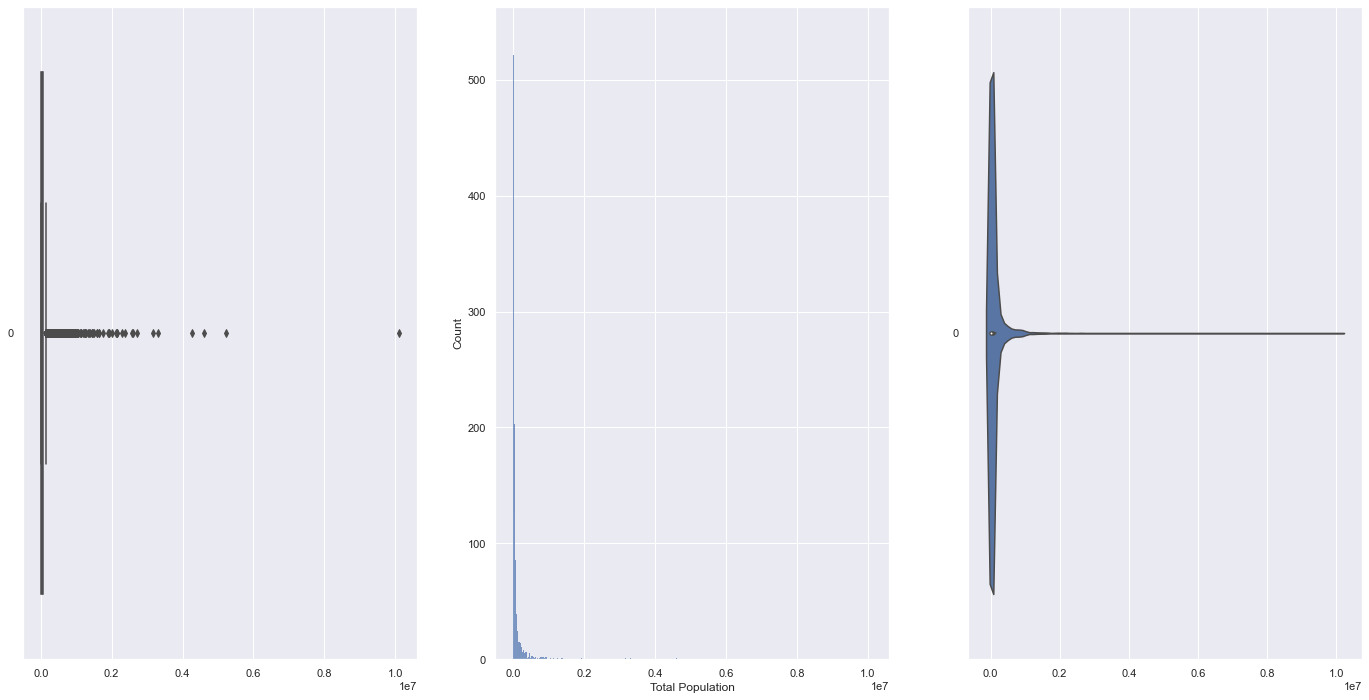

In [23]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid_total['Total Population'], orient = "h", ax = axes[0])
sb.histplot(data = usa_covid_total['Total Population'], ax = axes[1])
sb.violinplot(data = usa_covid_total['Total Population'], orient = "h", ax = axes[2])

In [24]:
usa_covid_total['Total Population'].skew()

13.965836399164933

Here we see Total Population to be HEAVILY right skew, with a skewness of 13.97. Although it will be unlikely to produce any fruitful insight, we will carry on with the initial bivariate analysis with the response variables.

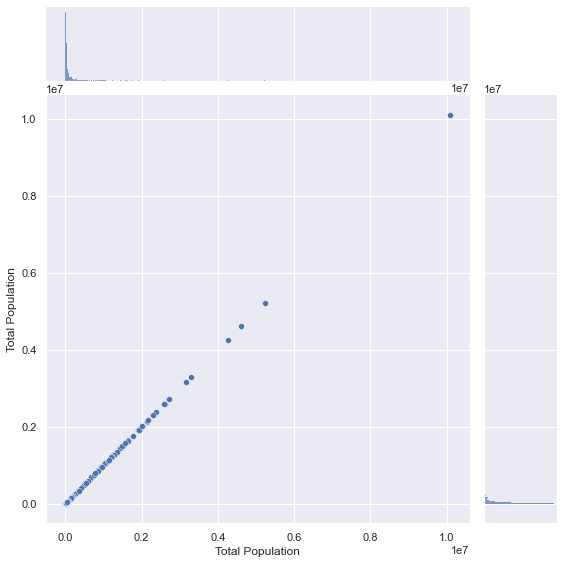

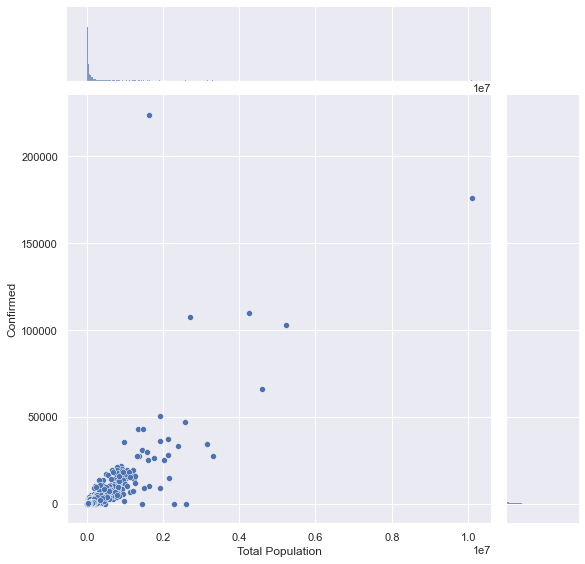

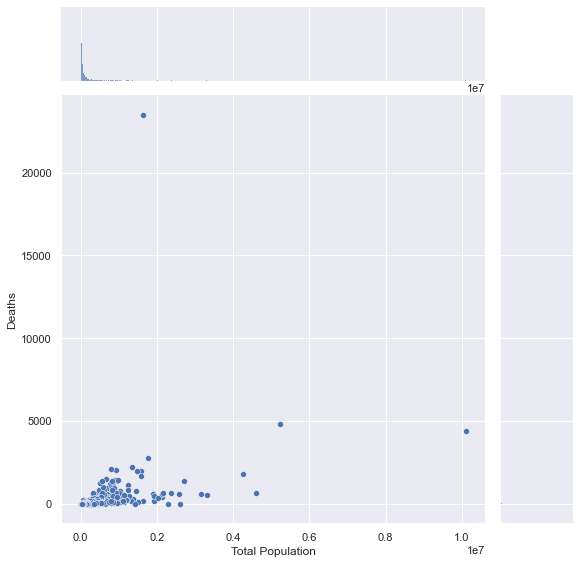

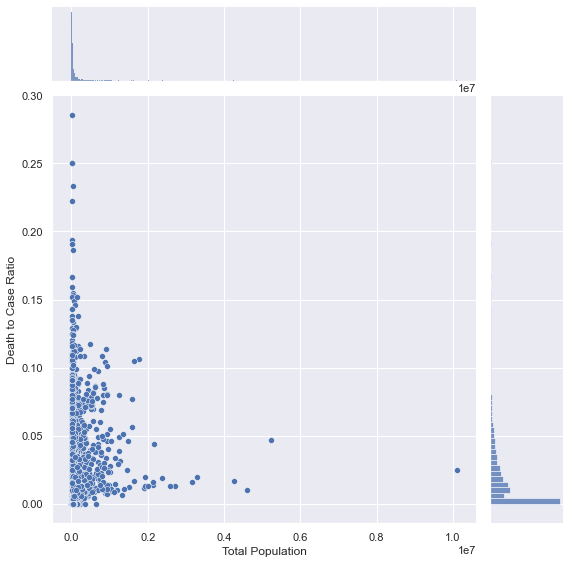

In [25]:
for var in usa_covid_total:
    sb.jointplot(data = usa_covid_total, x = "Total Population", y = var, height = 8)

In [26]:
usa_covid_total.corr()

,Total Population,Confirmed,Deaths,Death to Case Ratio
Total Population,1.000000,0.793674,0.391203,0.086990
Confirmed,0.793674,1.000000,0.794622,0.084918
Deaths,0.391203,0.794622,1.000000,0.135629
Death to Case Ratio,0.086990,0.084918,0.135629,1.000000


<AxesSubplot:>

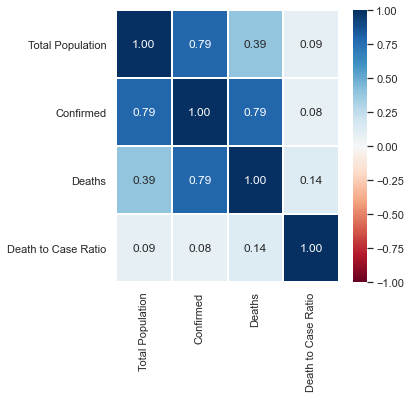

In [27]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usa_covid_total.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

As expected, the jointplot seems to not be representative of the data as a whole. However, something that we may want to note is the relationship between Total Population and Confirmed cases. At the extremes, it does seem to follow some sort of linear relationship, with a fairly high correlation. We will take note of this as we remove these outliers and observe how the relationship changes.

In [28]:
usa_covid_total_clean = pd.DataFrame(removeOutliers(usa_covid_total))
usa_covid_total_clean.head()

,Total Population,Confirmed,Deaths,Death to Case Ratio
0,55200,932.0,20.0,0.021459
2,25782,529.0,4.0,0.007561
3,22527,327.0,2.0,0.006116
4,57645,601.0,1.0,0.001664
5,10352,409.0,11.0,0.026895


In [29]:
usa_covid_total_clean.describe()

,Total Population,Confirmed,Deaths,Death to Case Ratio
count,2438.000000,2438.000000,2438.000000,2438.000000
mean,29393.038146,212.767022,3.643970,0.013903
std,27884.821968,262.673672,5.925643,0.016958
min,454.000000,1.000000,0.000000,0.000000
25%,9781.000000,36.000000,0.000000,0.000000
50%,20337.500000,107.000000,1.000000,0.008408
75%,39271.750000,286.000000,4.000000,0.022346
max,149452.000000,1386.000000,32.000000,0.074074


<AxesSubplot:>

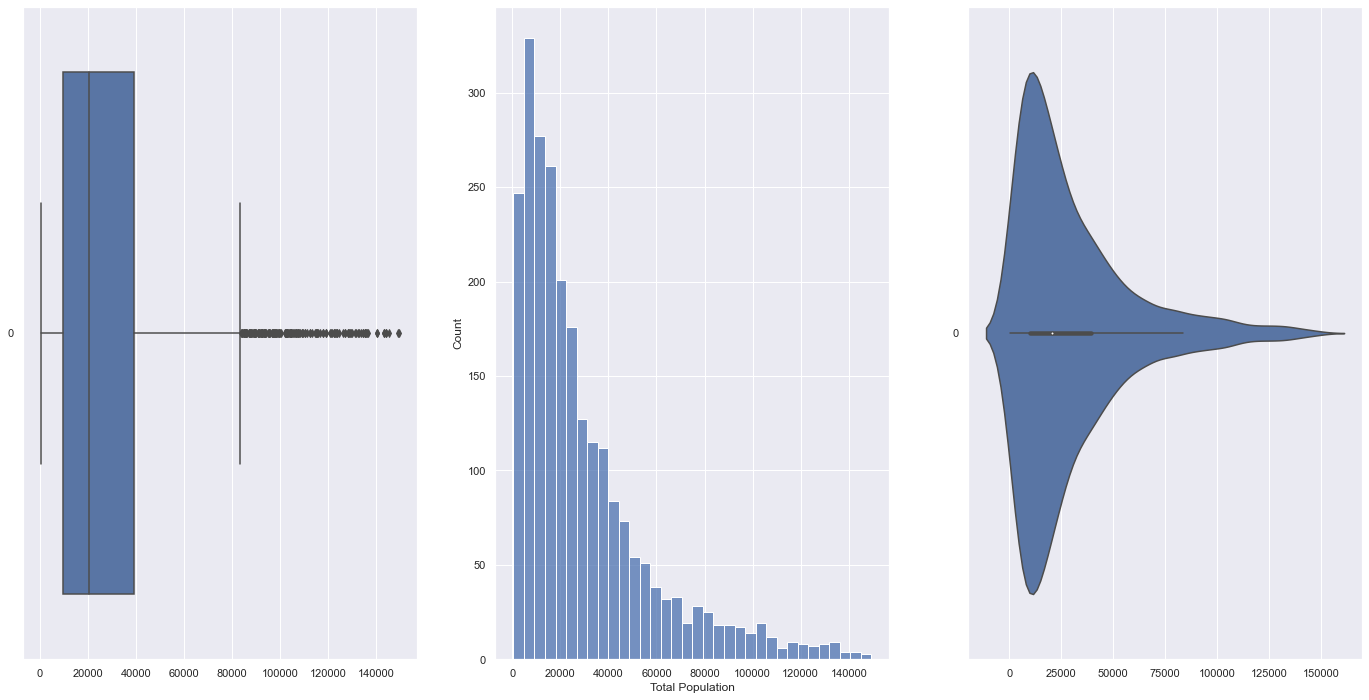

In [30]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid_total_clean['Total Population'], orient = "h", ax = axes[0])
sb.histplot(data = usa_covid_total_clean['Total Population'], ax = axes[1])
sb.violinplot(data = usa_covid_total_clean['Total Population'], orient = "h", ax = axes[2])

In [31]:
usa_covid_total_clean['Total Population'].skew()

1.6993144076030837

With outliers removed, we still observe a heavy right skew on the distribution, however it does look more manageable and may give us more insight to plot against the response variables.

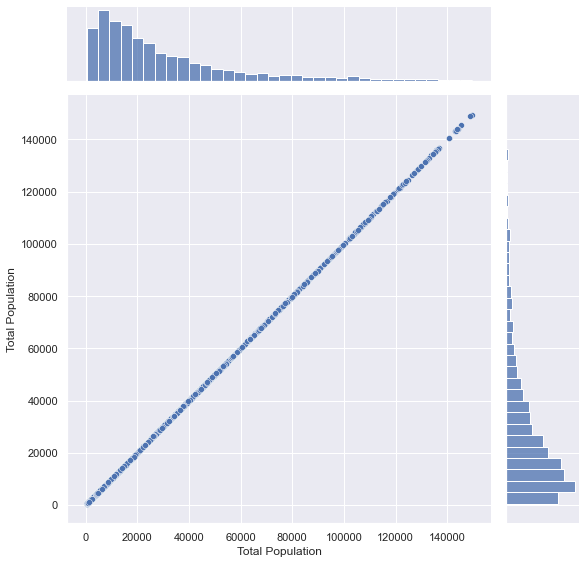

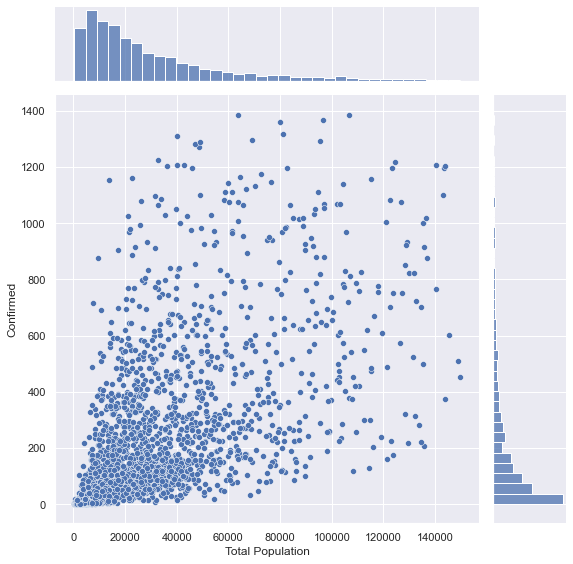

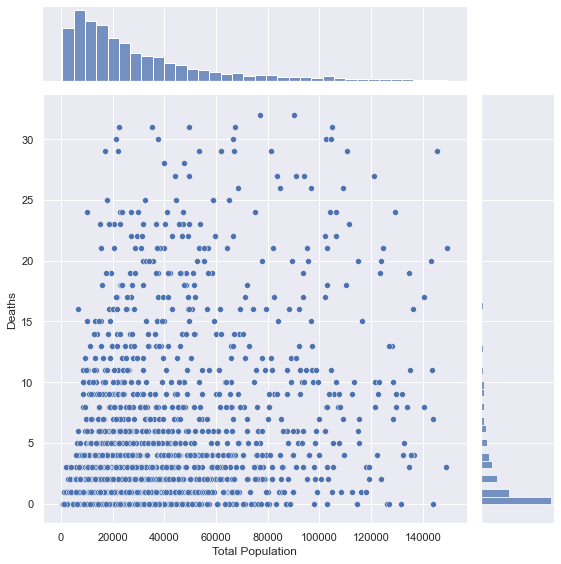

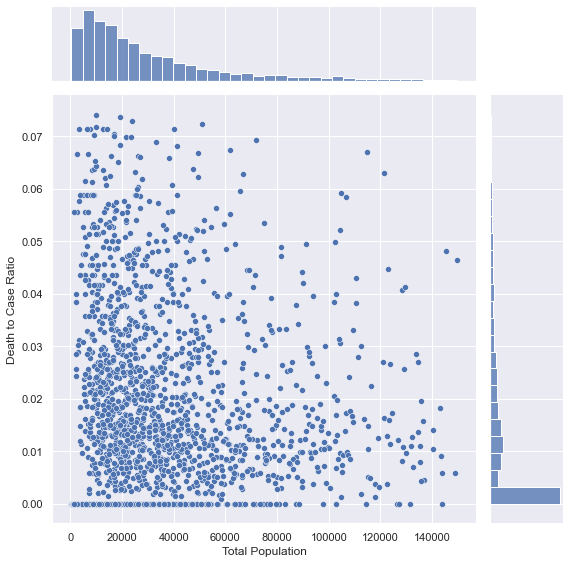

In [32]:
for var in usa_covid_total_clean:
    sb.jointplot(data = usa_covid_total_clean, x = "Total Population", y = var, height = 8)

In [33]:
usa_covid_total_clean.corr()

,Total Population,Confirmed,Deaths,Death to Case Ratio
Total Population,1.000000,0.615281,0.434476,0.147095
Confirmed,0.615281,1.000000,0.708325,0.154024
Deaths,0.434476,0.708325,1.000000,0.578289
Death to Case Ratio,0.147095,0.154024,0.578289,1.000000


<AxesSubplot:>

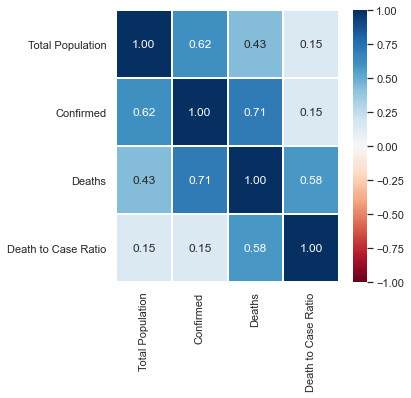

In [34]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usa_covid_total_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Here we note that there is a fairly strong linear correlation between Total Population and Confirmed cases, as well as a slightly weaker but still evident correlation with Deaths. This is promising for us and can be kept in mind as we carry on with our data exploration.

## Bi-Variate Analysis: Population Density as a predictor Variable

In [35]:
usa_covid_density = usa_covid_population[['Population Density (people per square kilometer)', 'Confirmed', 'Deaths', 'Death to Case Ratio']]
usa_covid_density.head()

,Population Density (people per square kilometer),Confirmed,Deaths,Death to Case Ratio
0,35.853419,932,20,0.021459
1,50.541504,2727,17,0.006234
2,11.247981,529,4,0.007561
3,13.973114,327,2,0.006116
4,34.515816,601,1,0.001664


In [36]:
usa_covid_density.describe()

,Population Density (people per square kilometer),Confirmed,Deaths,Death to Case Ratio
count,3220.000000,3220.000000,3220.00000,3159.000000
mean,112.623419,1316.137578,45.27764,0.021551
std,693.241940,6962.304363,456.31641,0.028900
min,0.014362,0.000000,0.00000,0.000000
25%,6.636347,43.000000,0.00000,0.000000
50%,17.822770,158.000000,2.00000,0.012367
75%,51.347991,585.000000,13.00000,0.029668
max,27819.804800,224051.000000,23500.00000,0.285714


<AxesSubplot:>

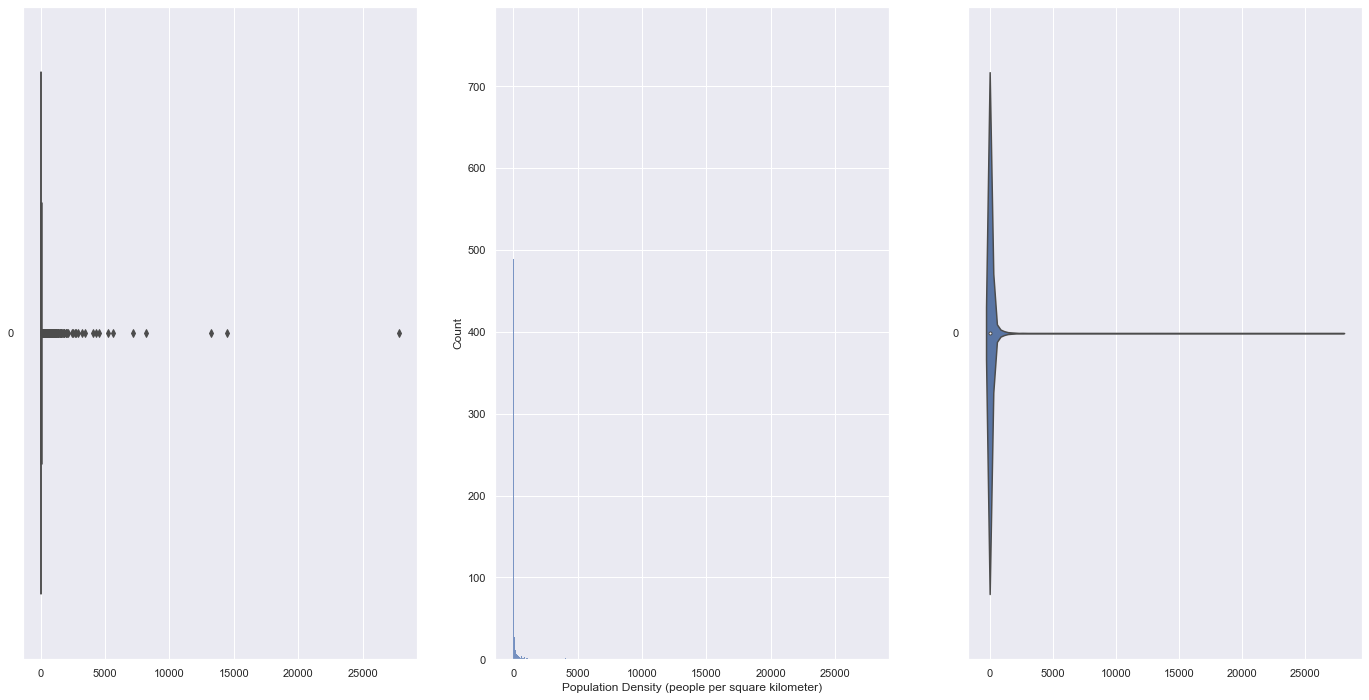

In [37]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid_density['Population Density (people per square kilometer)'], orient = "h", ax = axes[0])
sb.histplot(data = usa_covid_density['Population Density (people per square kilometer)'], ax = axes[1])
sb.violinplot(data = usa_covid_density['Population Density (people per square kilometer)'], orient = "h", ax = axes[2])

In [38]:
usa_covid_density['Population Density (people per square kilometer)'].skew()

26.246391553434226

Similar to Total Population, we see that Population Density is heavily right skew, however we will still carry on with the initial bivariate analysis to observe for any insight.

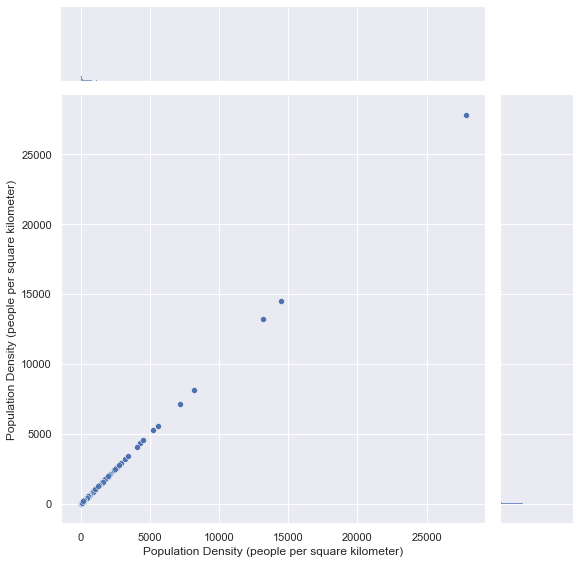

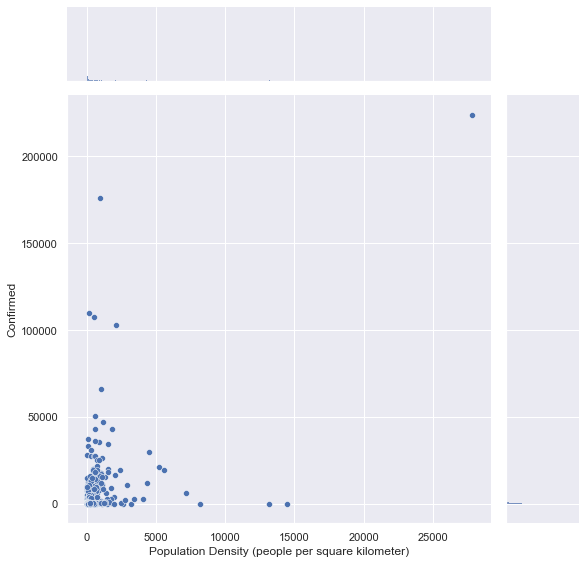

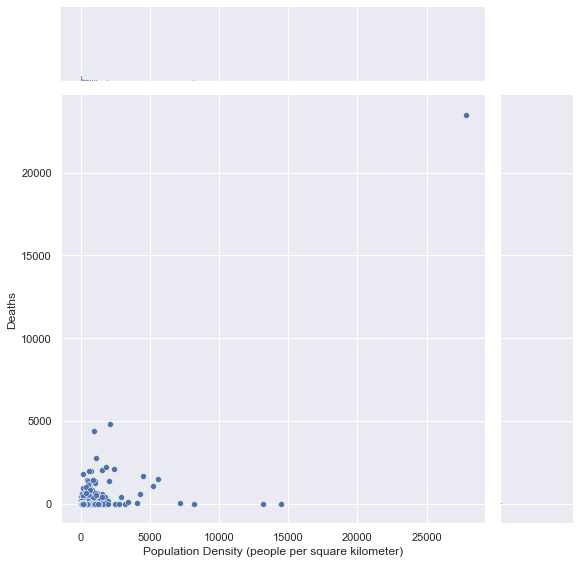

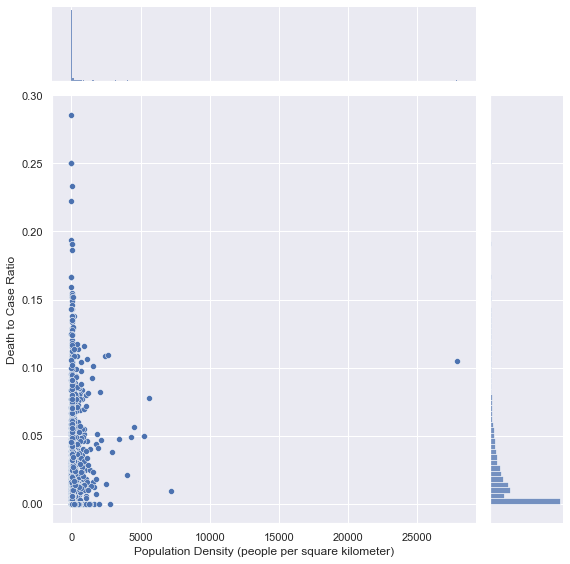

In [39]:
for var in usa_covid_density:
    sb.jointplot(data = usa_covid_density, x = "Population Density (people per square kilometer)", y = var, height = 8)

In [40]:
usa_covid_density.corr()

,Population Density (people per square kilometer),Confirmed,Deaths,Death to Case Ratio
Population Density (people per square kilometer),1.000000,0.527933,0.724268,0.093857
Confirmed,0.527933,1.000000,0.794622,0.084918
Deaths,0.724268,0.794622,1.000000,0.135629
Death to Case Ratio,0.093857,0.084918,0.135629,1.000000


<AxesSubplot:>

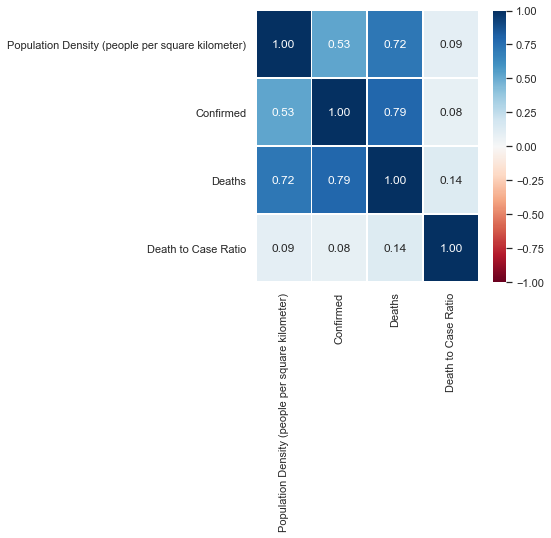

In [41]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usa_covid_density.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

As expected, the jointplot gives us little to no information, however the correlation between Population Density and Confirmed cases and Deaths may be interesting to look into, so we will keep our eye on that as we remove outliers from the data set.

In [42]:
usa_covid_density_clean = pd.DataFrame(removeOutliers(usa_covid_density))
usa_covid_density_clean.head()

,Population Density (people per square kilometer),Confirmed,Deaths,Death to Case Ratio
0,35.853419,932.0,20.0,0.021459
2,11.247981,529.0,4.0,0.007561
3,13.973114,327.0,2.0,0.006116
4,34.515816,601.0,1.0,0.001664
5,6.417620,409.0,11.0,0.026895


In [43]:
usa_covid_density_clean.describe()

,Population Density (people per square kilometer),Confirmed,Deaths,Death to Case Ratio
count,2342.000000,2342.000000,2342.000000,2342.000000
mean,19.301624,213.315115,3.737831,0.014316
std,20.450248,264.722200,5.994267,0.017059
min,0.014362,1.000000,0.000000,0.000000
25%,5.029387,34.000000,0.000000,0.000000
50%,12.880347,105.000000,1.000000,0.008929
75%,25.966488,288.000000,4.000000,0.022989
max,117.563045,1386.000000,32.000000,0.074074


<AxesSubplot:>

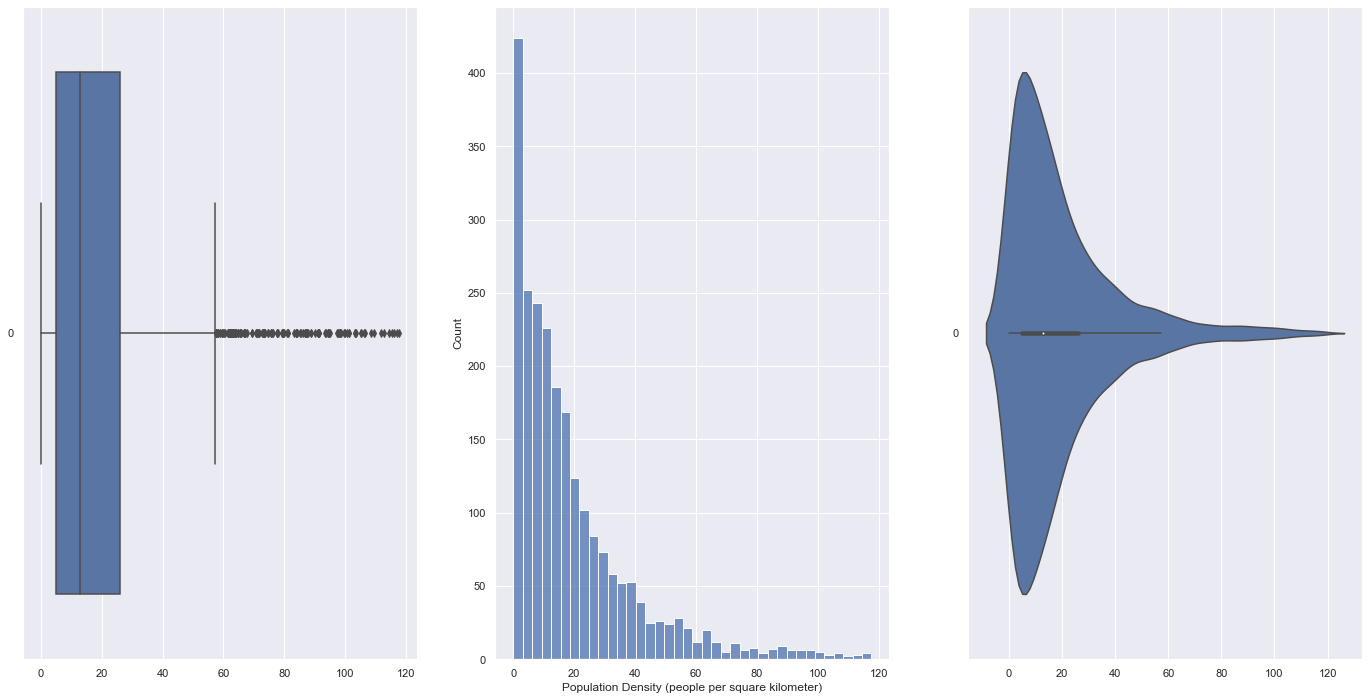

In [44]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid_density_clean['Population Density (people per square kilometer)'], orient = "h", ax = axes[0])
sb.histplot(data = usa_covid_density_clean['Population Density (people per square kilometer)'], ax = axes[1])
sb.violinplot(data = usa_covid_density_clean['Population Density (people per square kilometer)'], orient = "h", ax = axes[2])

In [45]:
usa_covid_density_clean['Population Density (people per square kilometer)'].skew()

1.929665010732421

Similar with Total Population, we still observe a right skew, although it is much lower than it was when outliers were present.

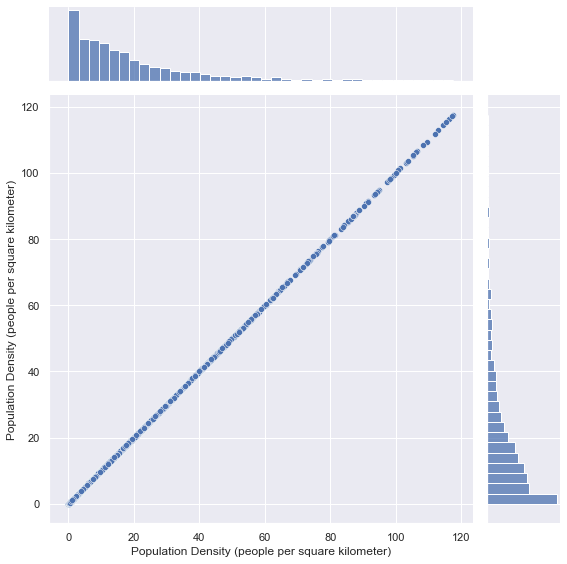

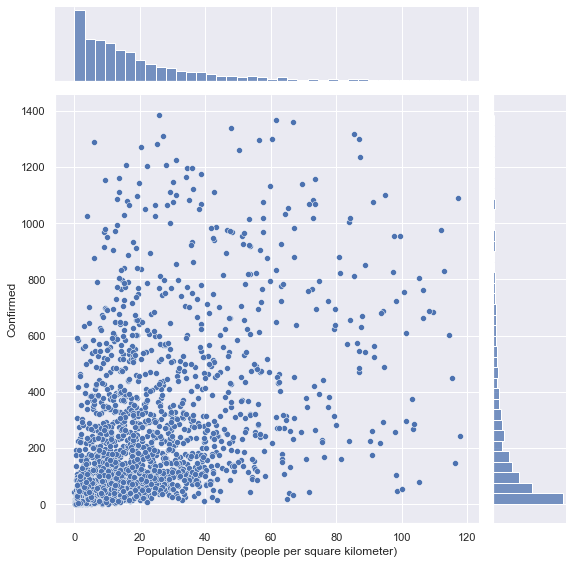

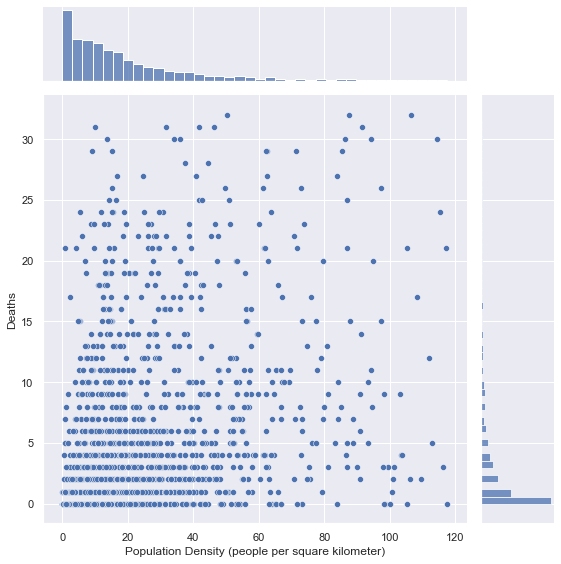

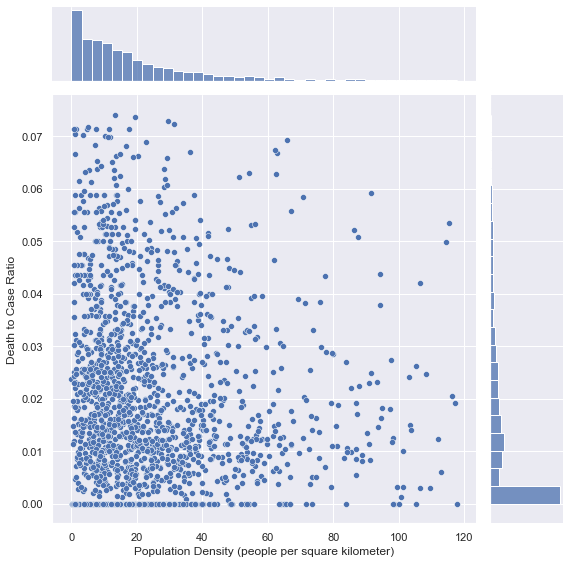

In [46]:
for var in usa_covid_density_clean:
    sb.jointplot(data = usa_covid_density_clean, x = "Population Density (people per square kilometer)", y = var, height = 8)

In [47]:
usa_covid_density_clean.corr()

,Population Density (people per square kilometer),Confirmed,Deaths,Death to Case Ratio
Population Density (people per square kilometer),1.000000,0.507029,0.414350,0.168061
Confirmed,0.507029,1.000000,0.710360,0.151527
Deaths,0.414350,0.710360,1.000000,0.571421
Death to Case Ratio,0.168061,0.151527,0.571421,1.000000


<AxesSubplot:>

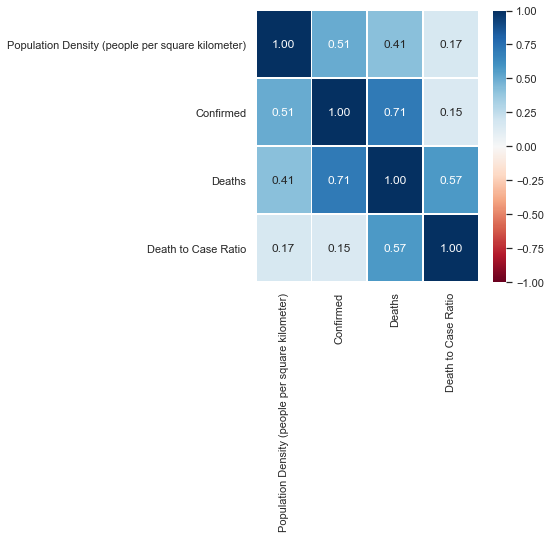

In [48]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usa_covid_density_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Removing outliers, we do see a dip in correlation, however it is interesting that the dip is not that extreme. The correlation between Population Density and Confirmed cases remains fairly high at 0.557 and against Deaths at 0.452. This is promising as we may be able to proceed with fitting a model to the response variables using our selected predictors.

## Multi-Variate Analysis: Creating a model to fit Response Variable (Confirmed)

Moving forward with regression analysis, we will the number of Confirmed cases as our response variable of choice as it makes sense both from a statistical perspective and geographic perspective. Statistically, Confirmed cases seems to have the highest correlation with each of our predictor variables, and geographically, it would make sense that when there are more individuals in a given household or county, the spread of the virus would quicken in those areas.

In [49]:
usa_covid_popmodel = usa_covid_population[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)', 'Confirmed']]
usa_covid_popmodel.head()

,Average Household Size,Total Population,Population Density (people per square kilometer),Confirmed
0,2.59,55200,35.853419,932
1,2.61,208107,50.541504,2727
2,2.49,25782,11.247981,529
3,2.99,22527,13.973114,327
4,2.77,57645,34.515816,601


In [50]:
usa_covid_popmodel.describe()

,Average Household Size,Total Population,Population Density (people per square kilometer),Confirmed
count,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,2.529093,1.013323e+05,112.623419,1316.137578
std,0.279374,3.260964e+05,693.241940,6962.304363
min,1.340000,7.500000e+01,0.014362,0.000000
25%,2.350000,1.121425e+04,6.636347,43.000000
50%,2.490000,2.595050e+04,17.822770,158.000000
75%,2.650000,6.655225e+04,51.347991,585.000000
max,4.970000,1.009805e+07,27819.804800,224051.000000


Now, we will split the data into the training and testing data, utilising an 80:20 split.

In [51]:
# Removing outliers before train_test_split
# usa_covid_popmodel = pd.DataFrame(removeOutliers(usa_covid_popmodel))
usa_covid_popmodel.head()

,Average Household Size,Total Population,Population Density (people per square kilometer),Confirmed
0,2.59,55200,35.853419,932
1,2.61,208107,50.541504,2727
2,2.49,25782,11.247981,529
3,2.99,22527,13.973114,327
4,2.77,57645,34.515816,601


In [52]:
usa_covid_popmodel.describe()

,Average Household Size,Total Population,Population Density (people per square kilometer),Confirmed
count,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,2.529093,1.013323e+05,112.623419,1316.137578
std,0.279374,3.260964e+05,693.241940,6962.304363
min,1.340000,7.500000e+01,0.014362,0.000000
25%,2.350000,1.121425e+04,6.636347,43.000000
50%,2.490000,2.595050e+04,17.822770,158.000000
75%,2.650000,6.655225e+04,51.347991,585.000000
max,4.970000,1.009805e+07,27819.804800,224051.000000


In [53]:
usa_covid_popmodel_train, usa_covid_popmodel_test = train_test_split(usa_covid_popmodel, test_size=0.2)

In [54]:
# usa_population_predictors_train = pd.DataFrame(usa_covid_popmodel_train[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)']])
# usa_population_response_train = pd.DataFrame(usa_covid_popmodel_train[['Confirmed']])
# usa_population_predictors_test = pd.DataFrame(usa_covid_popmodel_test[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)']])
# usa_population_response_test = pd.DataFrame(usa_covid_popmodel_test[['Confirmed']])

In [55]:
usa_population_predictors_train = pd.DataFrame(usa_covid_popmodel_train[['Total Population', 'Population Density (people per square kilometer)']])
usa_population_response_train = pd.DataFrame(usa_covid_popmodel_train[['Confirmed']])
usa_population_predictors_test = pd.DataFrame(usa_covid_popmodel_test[['Total Population', 'Population Density (people per square kilometer)']])
usa_population_response_test = pd.DataFrame(usa_covid_popmodel_test[['Confirmed']])

It should be noted here that the train_test_split function of SciKit-Learn is random, and thus results may differ from each run of the analysis

In [56]:
linreg.fit(usa_population_predictors_train, usa_population_response_train)

LinearRegression()

In [57]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
pd.DataFrame(list(zip(usa_population_predictors_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept 	: b =  [-549.05216946]
Coefficients 	: a =  [[0.01436685 3.7596627 ]]


,Predictors,Coefficients
0,Total Population,0.014367
1,Population Density (people per square kilometer),3.759663


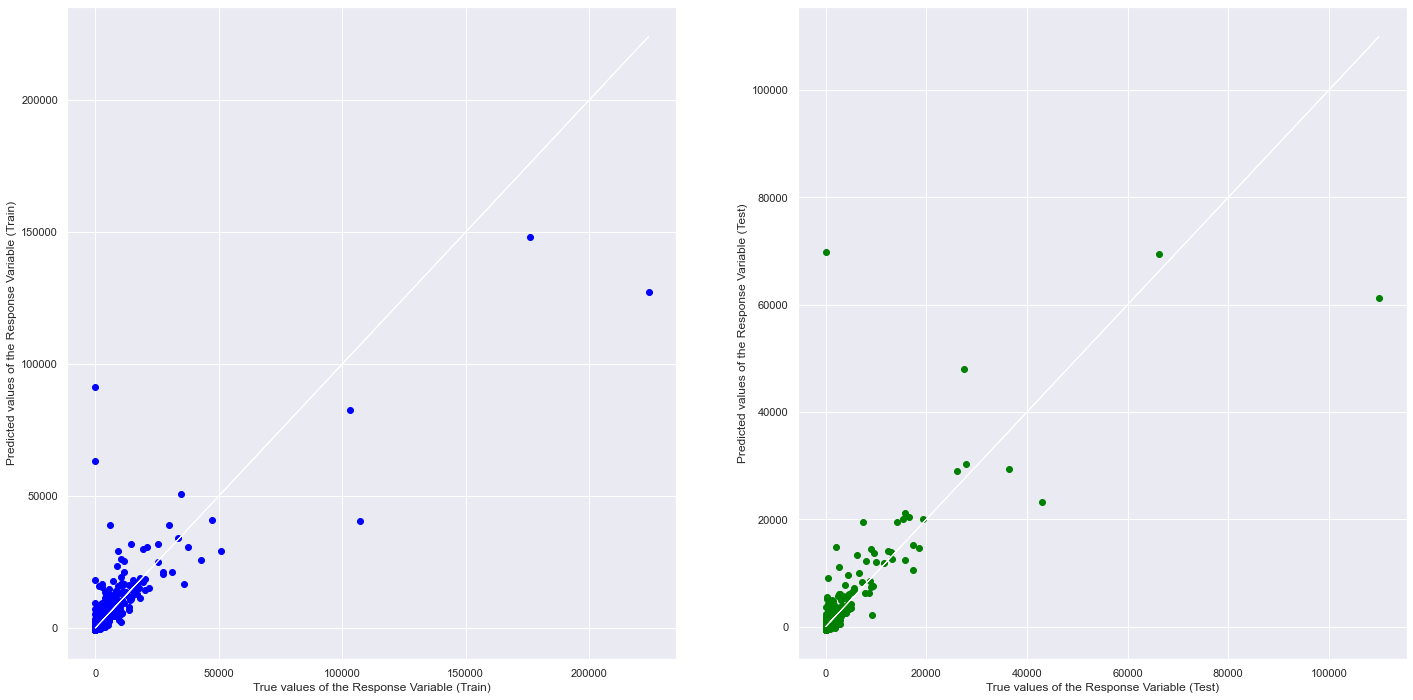

In [58]:
# Predict the Total values from Predictors
usa_population_response_train_pred = linreg.predict(usa_population_predictors_train)
usa_population_response_test_pred = linreg.predict(usa_population_predictors_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_population_response_train, usa_population_response_train_pred, color = "blue")
axes[0].plot(usa_population_response_train, usa_population_response_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(usa_population_response_test, usa_population_response_test_pred, color = "green")
axes[1].plot(usa_population_response_test, usa_population_response_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [59]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_predictors_train, usa_population_response_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_population_response_train, usa_population_response_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_predictors_test, usa_population_response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_population_response_test, usa_population_response_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7197613721276364
Mean Squared Error (MSE) 	: 14222480.479211025

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6270350193705652
Mean Squared Error (MSE) 	: 14639427.186026989



With this, we do not get a very strong Goodness of Fit for the test data, so lets try to model the regression using a cleaner version of the training data, without outliers.

In [60]:
# usa_covid_popmodel_train_clean = pd.DataFrame(removeOutliers(usa_covid_popmodel_train))
# usa_population_predictors_train_clean = pd.DataFrame(usa_covid_popmodel_train_clean[['Average Household Size', 'Total Population', 'Population Density (people per square kilometer)']])
# usa_population_response_train_clean = pd.DataFrame(usa_covid_popmodel_train_clean[['Confirmed']])

In [61]:
usa_covid_popmodel_train_clean = pd.DataFrame(removeOutliers(usa_covid_popmodel_train))
usa_population_predictors_train_clean = pd.DataFrame(usa_covid_popmodel_train_clean[['Total Population', 'Population Density (people per square kilometer)']])
usa_population_response_train_clean = pd.DataFrame(usa_covid_popmodel_train_clean[['Confirmed']])

In [62]:
linreg.fit(usa_population_predictors_train_clean, usa_population_response_train_clean)

LinearRegression()

In [63]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
pd.DataFrame(list(zip(usa_population_predictors_train_clean.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept 	: b =  [40.08767468]
Coefficients 	: a =  [[0.00465351 2.01956914]]


,Predictors,Coefficients
0,Total Population,0.004654
1,Population Density (people per square kilometer),2.019569


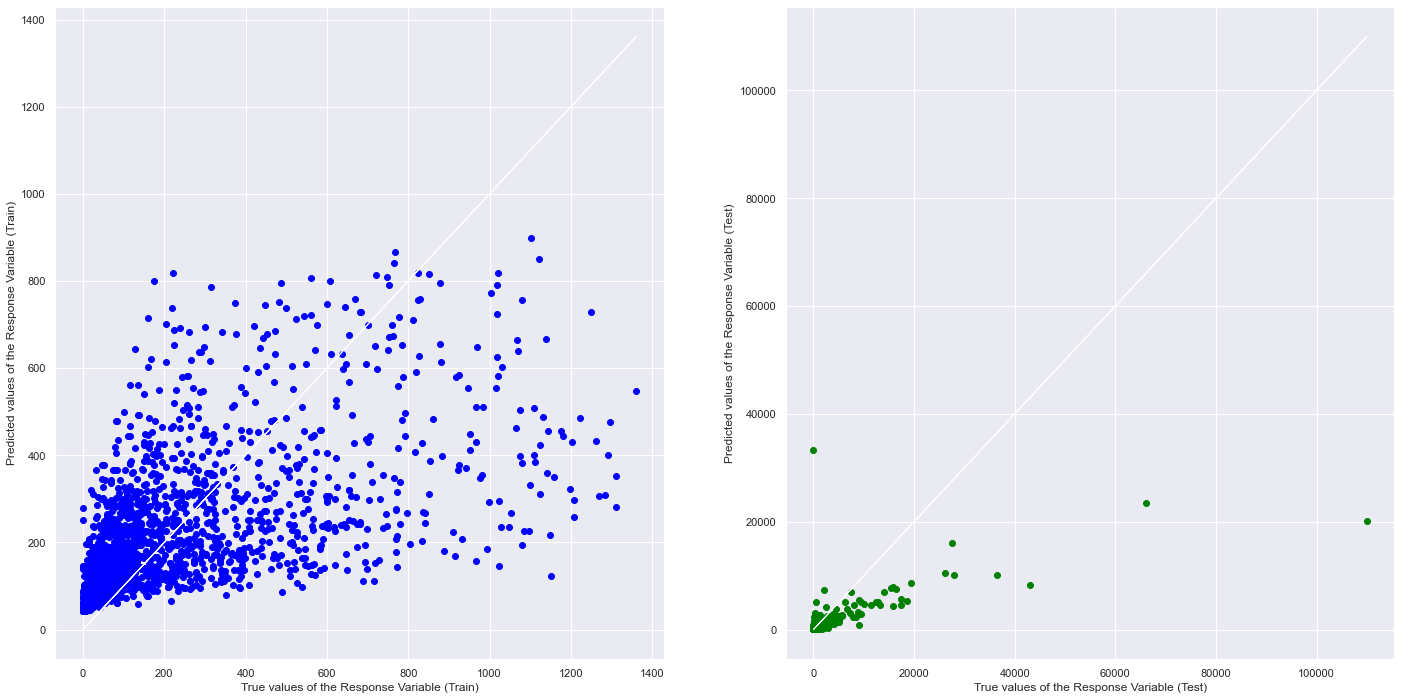

In [64]:
# Predict the Total values from Predictors
usa_population_response_train_clean_pred = linreg.predict(usa_population_predictors_train_clean)
usa_population_response_test_pred = linreg.predict(usa_population_predictors_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_population_response_train_clean, usa_population_response_train_clean_pred, color = "blue")
axes[0].plot(usa_population_response_train_clean, usa_population_response_train_clean, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(usa_population_response_test, usa_population_response_test_pred, color = "green")
axes[1].plot(usa_population_response_test, usa_population_response_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [65]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_predictors_train_clean, usa_population_response_train_clean))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_population_response_train_clean, usa_population_response_train_clean_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_predictors_test, usa_population_response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_population_response_test, usa_population_response_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3678558713700544
Mean Squared Error (MSE) 	: 43908.128146210154

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.38851580801381647
Mean Squared Error (MSE) 	: 24001659.053567976



## Regression Analysis: Using only Total Population

In [66]:
usa_population_totalpop_train = pd.DataFrame(usa_covid_popmodel_train[['Total Population']])
usa_population_confirmed_train = pd.DataFrame(usa_covid_popmodel_train[['Confirmed']])
usa_population_totalpop_test = pd.DataFrame(usa_covid_popmodel_test[['Total Population']])
usa_population_confirmed_test = pd.DataFrame(usa_covid_popmodel_test[['Confirmed']])

In [67]:
linreg.fit(usa_population_totalpop_train, usa_population_confirmed_train)

LinearRegression()

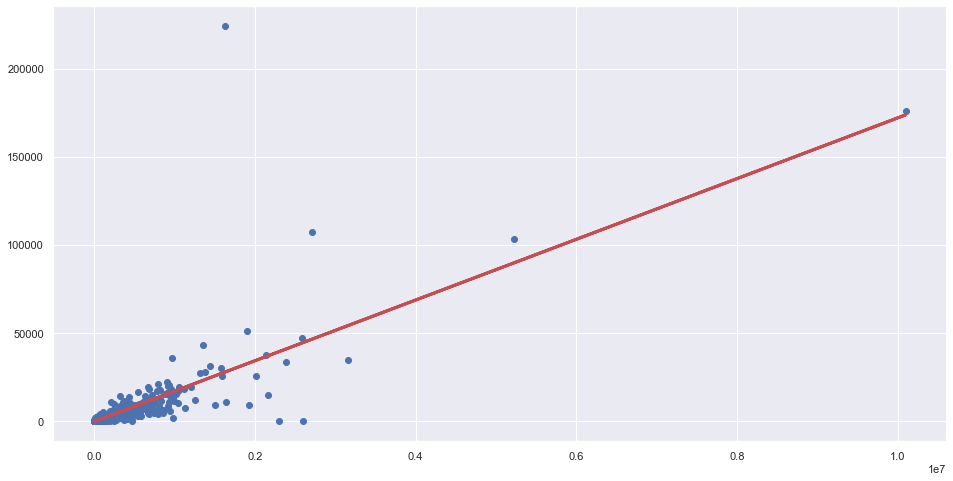

In [68]:
# Formula for the Regression line
regline_x = usa_population_totalpop_train
regline_y = linreg.intercept_ + linreg.coef_ * usa_population_totalpop_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(usa_population_totalpop_train, usa_population_confirmed_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

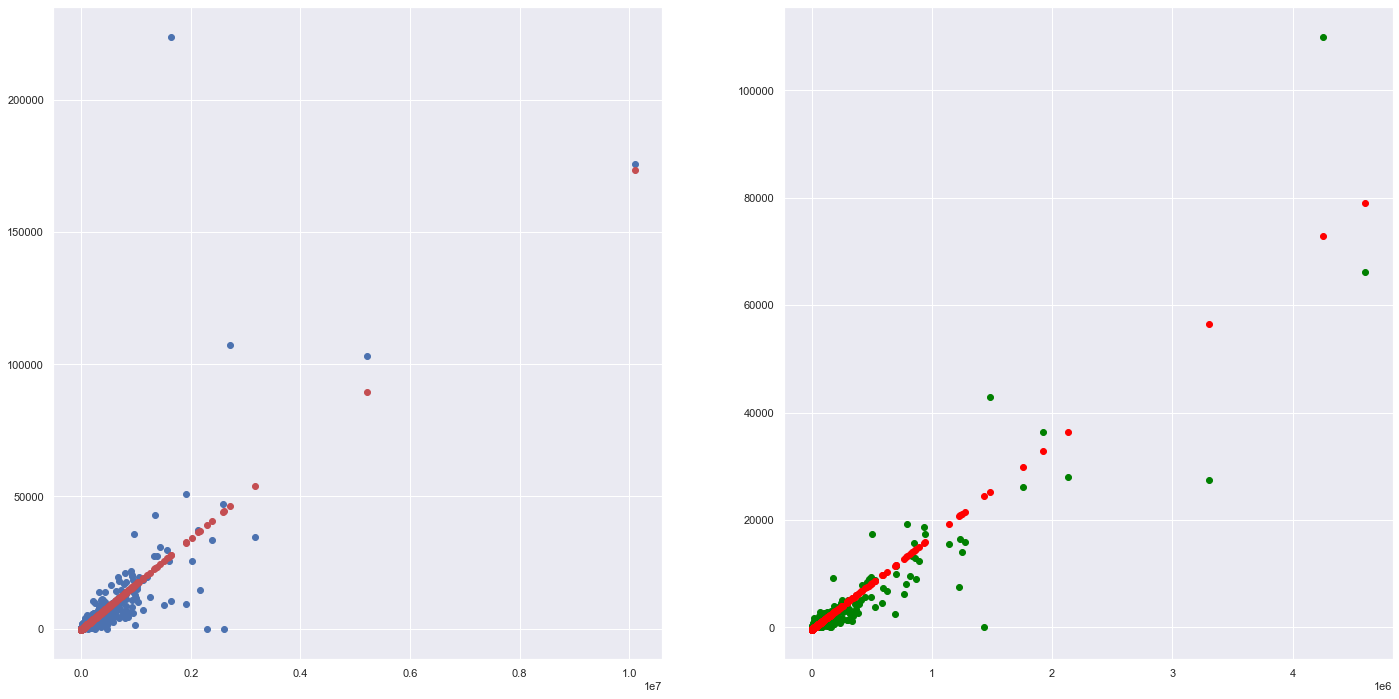

In [69]:
usa_population_confirmed_train_pred = linreg.predict(usa_population_totalpop_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_population_totalpop_train, usa_population_confirmed_train)
axes[0].scatter(usa_population_totalpop_train, usa_population_confirmed_train_pred, color = "r")

usa_population_confirmed_test_pred = linreg.predict(usa_population_totalpop_test)

# Plot the Predictions
axes[1].scatter(usa_population_totalpop_test, usa_population_confirmed_test, color = "green")
axes[1].scatter(usa_population_totalpop_test, usa_population_confirmed_test_pred, color = "red")
plt.show()

In [70]:
# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_totalpop_train, usa_population_confirmed_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(usa_population_confirmed_train, usa_population_confirmed_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print("")

# Explained Variance (R^2)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_totalpop_test, usa_population_confirmed_test))

mse = mean_sq_err(usa_population_confirmed_test, usa_population_confirmed_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5919316708532085
Mean Squared Error (MSE) 	: 20710006.645186163
Root Mean Squared Error (RMSE) 	: 4550.824831301043

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.824791957680691
Mean Squared Error (MSE) 	: 6877174.831833072
Root Mean Squared Error (RMSE) 	: 2622.4368117903377


Removing outliers from the training set to try again.

In [71]:
usa_covid_popmodel_train_clean = pd.DataFrame(removeOutliers(usa_covid_popmodel_train))
usa_population_totalpop_train_clean = pd.DataFrame(usa_covid_popmodel_train_clean[['Total Population']])
usa_population_confirmed_train_clean = pd.DataFrame(usa_covid_popmodel_train_clean[['Confirmed']])

In [72]:
linreg.fit(usa_population_totalpop_train_clean, usa_population_confirmed_train_clean)

LinearRegression()

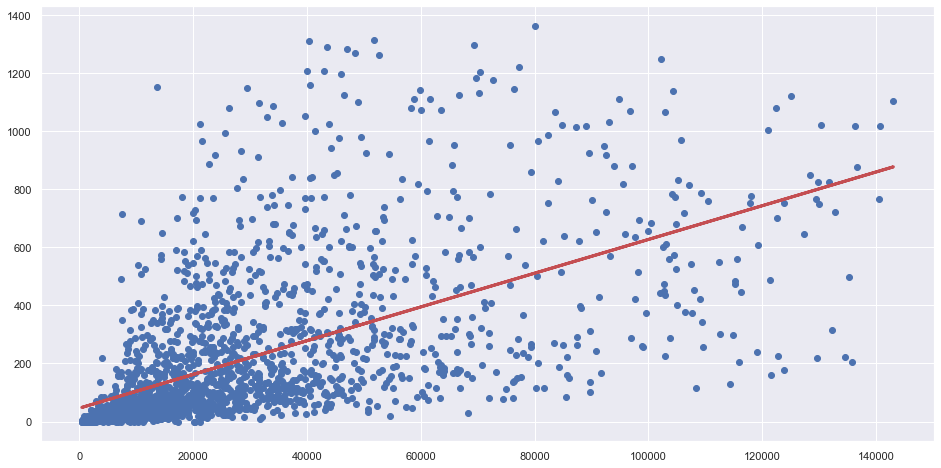

In [73]:
# Formula for the Regression line
regline_x = usa_population_totalpop_train_clean
regline_y = linreg.intercept_ + linreg.coef_ * usa_population_totalpop_train_clean

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(usa_population_totalpop_train_clean, usa_population_confirmed_train_clean)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

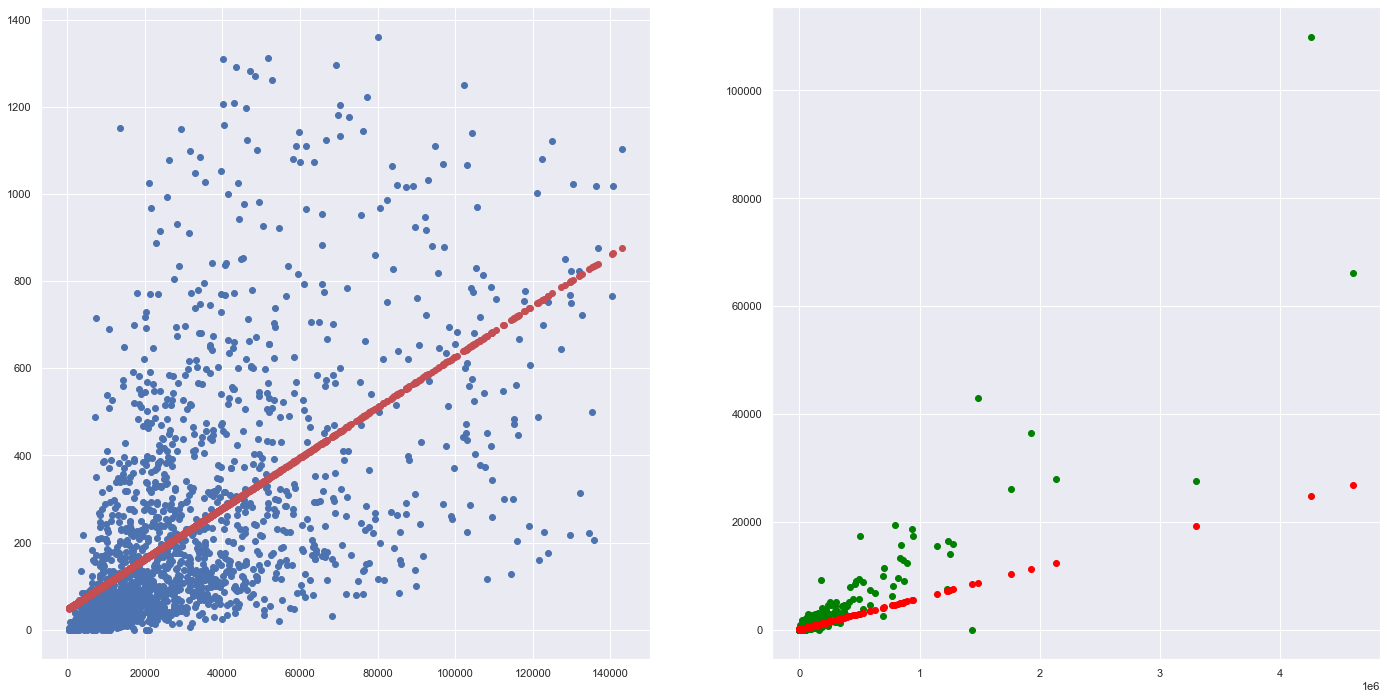

In [74]:
# Predict Total values corresponding to HP Train
usa_population_confirmed_train_clean_pred = linreg.predict(usa_population_totalpop_train_clean)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_population_totalpop_train_clean, usa_population_confirmed_train_clean)
axes[0].scatter(usa_population_totalpop_train_clean, usa_population_confirmed_train_clean_pred, color = "r")

usa_population_confirmed_test_pred = linreg.predict(usa_population_totalpop_test)

# Plot the Predictions
axes[1].scatter(usa_population_totalpop_test, usa_population_confirmed_test, color = "green")
axes[1].scatter(usa_population_totalpop_test, usa_population_confirmed_test_pred, color = "red")
plt.show()

In [75]:
# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_totalpop_train_clean, usa_population_confirmed_train_clean))

mse = mean_sq_err(usa_population_confirmed_train_clean, usa_population_confirmed_train_clean_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print("")

# Explained Variance (R^2)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_population_totalpop_test, usa_population_confirmed_test))

mse = mean_sq_err(usa_population_confirmed_test, usa_population_confirmed_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.35797159261686207
Mean Squared Error (MSE) 	: 44594.68071938464
Root Mean Squared Error (RMSE) 	: 211.1745266820424

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4777529357221124
Mean Squared Error (MSE) 	: 20498969.789897494
Root Mean Squared Error (RMSE) 	: 4527.57879996555
